In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
population = iris_df['sepal_width']
population

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [4]:
sample = population.sample(n=30)

In [5]:
sample.count()

30

In [6]:
# the measure which describes sample data called statistic
# the measure which describes population data called parameter

In [7]:
sample.mean()# statistic

3.0999999999999996

In [8]:
population.mean() #called parameter

3.0573333333333337

In [9]:
# our sample size is small and not contains all information about population so this leads to standard error

In [10]:
# Point estimation - The value of statistics which estimate the value of parameter
# our sample mean can estimate population mean

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

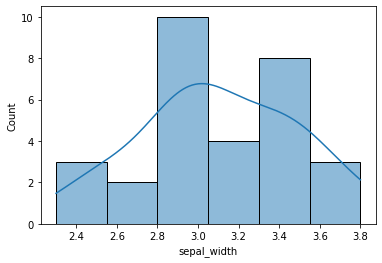

In [11]:
sns.histplot(sample,kde=True)

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

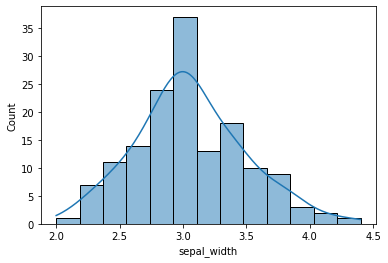

In [12]:
sns.histplot(population,kde=True)

In [13]:
# Confidence interval = (point estimate) + or - (margin error)
# lower bound  =(point estimate) - (margin error)
# upper bound  =(point estimate) + (margin error)

In [14]:
# assuming
alpha = 0.05
alpha_by_2 = 0.025 # always rembember we need to check z table for 1-0.025 (for ztest)
# we check z value for 0.975
z_value = 1.906
standard_error = population.std()/np.sqrt(sample.count())
lower_bound = sample.mean()-z_value*standard_error
upper_bound = sample.mean()+z_value*standard_error

In [15]:
lower_bound

2.948324461407359

In [16]:
upper_bound

3.2516755385926404

In [17]:
# Z-TEST 
# we are supposing that we have population std and also we have n>=30

In [18]:
from statsmodels.stats.weightstats import ztest as ztest

In [19]:
ztest(sample,value=population.mean()) # returned first value is ztest value and second value is p value

(0.604092545376455, 0.545782115437665)

In [20]:
p_value=0.545782115437665
if alpha>p_value:
    print("Reject the null hypothesis")
else:
    print('Failed to reject null hypothesis')

Reject the null hypothesis


In [21]:
# Another way as per theory
# our alpha value is 0.05 
# z table value for 1-0.05 is 1.6
if np.abs(-2.0814112026040994)>np.abs(1.6):
    print("Reject the null hypothesis")
else:
    print('Failed to reject null hypothesis')

Reject the null hypothesis


In [22]:
# Now if we do not have standard deviation of population data then we have perform t-test
sample1 = sample
sample2 = population.sample(30)

In [23]:
# T-TEST
from scipy import stats
# two sample t test
t_value,p_value = stats.ttest_ind(sample1,sample2)  

In [24]:
t_value

-1.1405158984122017

In [25]:
p_value

0.2587591390429018

In [26]:
# 1.
if alpha>p_value:
    print("Reject the null hypothesis")
else:
    print('Failed to reject null hypothesis')

Failed to reject null hypothesis


In [27]:
# 2.
# alpha = 0.05,degree of freedom = n-1 = 29
# from t table ,tscore = 0.683
tscore = 0.683 # this is decision rule boundation 
if t_value<-0.683 or t_value>0.683:
    print("Reject the null hypothesis")
else:
    print('Failed to reject null hypothesis')

Reject the null hypothesis


CHI SQUARE TEST

In [28]:
# Chi square test 
# non parametric,perform on categorical data

In [29]:
chi_population = iris_df['species']

In [30]:
chi_sample = chi_population.sample(30)
chi_sample

66     versicolor
56     versicolor
114     virginica
132     virginica
146     virginica
147     virginica
134     virginica
73     versicolor
105     virginica
62     versicolor
75     versicolor
148     virginica
69     versicolor
113     virginica
55     versicolor
144     virginica
149     virginica
14         setosa
93     versicolor
76     versicolor
123     virginica
48         setosa
84     versicolor
8          setosa
57     versicolor
67     versicolor
29         setosa
63     versicolor
53     versicolor
109     virginica
Name: species, dtype: object

In [31]:
chi_population.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [32]:
chi_sample.value_counts()

versicolor    14
virginica     12
setosa         4
Name: species, dtype: int64

In [33]:
# VERY VERY IMPORTANT CODE !!!!!!!!

chi_data = pd.concat((chi_population.value_counts(),chi_population.value_counts()/chi_population.count(),chi_sample.value_counts(),chi_sample.value_counts()/chi_sample.count()),axis=1)

In [34]:
chi_data.columns = ['population','population_relative','sample','sample_relative']
chi_data

,population,population_relative,sample,sample_relative
setosa,50,0.333333,4,0.133333
versicolor,50,0.333333,14,0.466667
virginica,50,0.333333,12,0.400000


In [35]:
chi_data['sample_expected'] = chi_data['population_relative']*chi_data['sample'].sum()
chi_data

,population,population_relative,sample,sample_relative,sample_expected
setosa,50,0.333333,4,0.133333,10.0
versicolor,50,0.333333,14,0.466667,10.0
virginica,50,0.333333,12,0.400000,10.0


In [36]:
# Now we have our sample values and expected sample values

In [37]:
chi_data['test'] = (chi_data['sample']-chi_data['sample_expected'])**2/chi_data['sample']
chi_data

,population,population_relative,sample,sample_relative,sample_expected,test
setosa,50,0.333333,4,0.133333,10.0,9.000000
versicolor,50,0.333333,14,0.466667,10.0,1.142857
virginica,50,0.333333,12,0.400000,10.0,0.333333


In [38]:
chi_value = chi_data['test'].sum()
chi_value

10.476190476190476

In [39]:
# alpha = 0.05,n = 3-1=2(degree of freedom)
# so from chi squre table
chi_decision_value = 5.991
if chi_decision_value < -5.991 or chi_value>5.991:
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject the null hypothesis


follow me for more exiting data science related content - Kaluram kharra